In [2]:
! pip3 install torch torchvision

    100% |████████████████████████████████| 484.0MB 136kB/s ta 0:00:0111% |▍                               | 6.0MB 1.4MB/s eta 0:05:54    2% |▊                               | 11.5MB 1.4MB/s eta 0:05:46    20% |██████▋                         | 100.2MB 1.7MB/s eta 0:03:49    30% |█████████▊                      | 146.3MB 1.3MB/s eta 0:04:20    31% |██████████▏                     | 153.1MB 1.4MB/s eta 0:03:56    45% |██████████████▍                 | 217.8MB 1.2MB/s eta 0:03:48    48% |███████████████▍                | 232.3MB 1.8MB/s eta 0:02:21    48% |███████████████▌                | 233.7MB 2.0MB/s eta 0:02:05    49% |███████████████▊                | 237.7MB 1.2MB/s eta 0:03:18    49% |███████████████▊                | 237.8MB 906kB/s eta 0:04:32    51% |████████████████▌               | 248.8MB 1.5MB/s eta 0:02:35    64% |████████████████████▋           | 311.5MB 1.5MB/s eta 0:01:55    66% |█████████████████████▎          | 321.7MB 1.4MB/s eta 0:01:53    67% |███████████████████

## Hyper parameters

In [6]:
import mxnet as mx
from mxnet import gluon, nd, autograd
from mxnet.gluon import nn

beta1 = .5
beta2 = .999
g_conv_dim = 64
d_conv_dim = 64
num_epoch = 40000
batch_size = 64
lr = .0002
log_step = 10
sample_step = 100
sample_path = './samples'
model_path = './models'

import os
# Create directories if not exist
if not os.path.exists('./models'):
    os.makedirs('./models')
if not os.path.exists('./samples'):
    os.makedirs('./samples')
    
context = mx.gpu()


In [8]:
from torchvision import datasets
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

svhn = datasets.SVHN(root = './svhn', download = True, transform = transform)
mnist = datasets.MNIST(root = './mnist', download = True, transform = transform)

Processing...
Done!


### Check images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


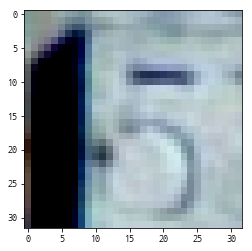

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow (np.transpose(svhn[36][0], (1, 2, 0)))

In [32]:
np.transpose(mnist[0][0], (1, 2, 0)).shape

torch.Size([32, 32, 1])

In [36]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow (np.transpose(mnist[10][0], (1, 2, 0)))

ValueError: axes don't match array

In [37]:
from mxnet.gluon.data.vision import MNIST, transforms

transform = transforms.Compose([
    transforms.Resize(300),
    transforms.RandomResizedCrop(224),
    transforms.RandomBrightness(0.1),
    transforms.ToTensor(),
    transforms.Normalize(0, 1)])
data = MNIST(train=True).transform_first(transform)

/opt/venv/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:118: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  label = np.fromstring(fin.read(), dtype=np.uint8).astype(np.int32)
/opt/venv/lib/python3.6/site-packages/mxnet/gluon/data/vision/datasets.py:122: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8)


In [38]:
from mxnet.gluon.data import DataLoader

svhn_loader = mx.gluon.data.DataLoader(svhn, batch_size=32, num_workers=5)

In [39]:
svhn_loader = mx.gluon.data.DataLoader(svhn, batch_size=32, num_workers=5)

## Model

In [ ]:
def deconv(c_in, c_out, k_size, stride = 2, pad = 1, bn = True):
    layers = []
    layers.append(nn.ConvTranspose2d)